In [1]:
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('../Resources/cars.csv')
data.head()

,year,hp,cylinders,doors,mpg_highway,mpg_city,popularity,msrp,make,model,fuel_type,transmission,drive,market_category,size,style
0,2004,140,4,2,33,23,1385,10135,Chevrolet,Cavalier,regular unleaded,MANUAL,front wheel drive,Compact,Compact,Coupe
1,2003,108,4,2,38,30,2031,10245,Toyota,ECHO,regular unleaded,MANUAL,front wheel drive,Compact,Compact,Coupe
2,2001,79,4,2,38,31,481,10299,Suzuki,Swift,regular unleaded,MANUAL,front wheel drive,Hatchback,Compact,2dr Hatchback
3,2005,140,4,2,33,23,1385,10325,Chevrolet,Cavalier,regular unleaded,MANUAL,front wheel drive,Compact,Compact,Coupe
4,2004,108,4,2,38,30,2031,10355,Toyota,ECHO,regular unleaded,MANUAL,front wheel drive,Compact,Compact,Coupe


In [3]:
data.dropna(inplace=True)

In [4]:
data[data.isna().any(axis=1)]

,year,hp,cylinders,doors,mpg_highway,mpg_city,popularity,msrp,make,model,fuel_type,transmission,drive,market_category,size,style


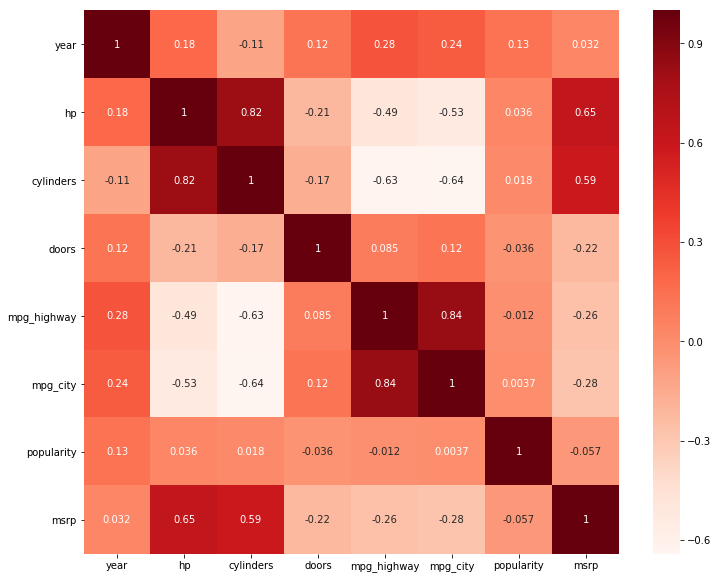

In [5]:
#Pearson Correlation
import seaborn as sns
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
cor_target = abs(cor["msrp"])


In [6]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features
print(data[["hp","cylinders"]].corr())
print(data[["cylinders","hp"]].corr())

                 hp  cylinders
hp         1.000000   0.823122
cylinders  0.823122   1.000000
           cylinders        hp
cylinders   1.000000  0.823122
hp          0.823122  1.000000


In [7]:
### Step 0: Reformat data
features = ["year", "hp", "doors", "mpg_highway", "mpg_city", "popularity", "make", "model", "fuel_type", "transmission", "drive" , "size" , "style", "market_category"]
X = data[features]
y = data[['msrp']]


In [8]:
X = pd.get_dummies(X, drop_first=True)

In [9]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
# # Scale Data

# ### BEGIN SOLUTION

# from sklearn.preprocessing import StandardScaler
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

# ### END SOLUTION
X_train_scaled = X_train
X_test_scaled = X_test
y_train_scaled = y_train
y_test_scaled = y_test

In [11]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

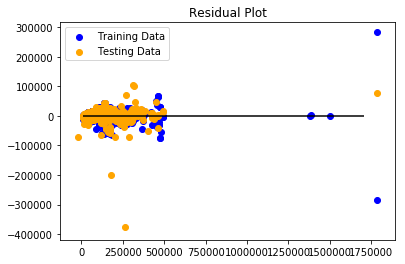

In [12]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION


In [13]:
model.score(X_train_scaled, y_train_scaled)

0.9862488465464142

In [15]:
model.score(X_test_scaled, y_test_scaled)

0.9676980122322323

In [16]:
# X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 129072855.21746483, R2: 0.9676980122322323


In [17]:
MSE**.5

11361.023510998682

In [18]:
# LASSO model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 146300210.09692654, R2: 0.9633866657012378


In [19]:
# Ridge model
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 127083582.72302352, R2: 0.9681958508805982


In [20]:
# ElasticNet model
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")


MSE: 994916795.9646236, R2: 0.7510104652209828
